In [ ]:
Ivan Yesid Garzon Gutierrez   //  Regrecion Loguistica 

In [6]:
# Importar librerías necesarias para análisis de datos y visualización
import pandas as pd       # Manejo de datos
import numpy as np        # Operaciones matemáticas y manejo de matrices
import matplotlib.pyplot as plt  # Visualización de gráficos básicos
import seaborn as sns     # Visualización avanzada y gráficos estadísticos



In [135]:
import pandas as pd  # Asegúrate de haber importado pandas

# Cargar archivo CSV en un DataFrame
# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo
df = pd.read_csv('heart_cleveland_upload.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print("Primeras filas del archivo cargado:")
df.head(7)


Primeras filas del archivo cargado:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0


In [19]:
df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [25]:
# Seleccionar columnas de tipo float
float_columns = df.select_dtypes(include=['float'])
print("Columnas de tipo float:")
print(float_columns.head())


Columnas de tipo float:
   oldpeak
0      0.1
1      1.8
2      2.6
3      1.4
4      1.8


In [27]:
# Identificar valores atípicos en columnas float
outliers = pd.DataFrame()

for col in float_columns.columns:
    Q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                # Rango intercuartílico

    # Identificar outliers
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outliers[col] = is_outlier

print("Valores atípicos identificados (True indica un outlier):")
print(outliers)


Valores atípicos identificados (True indica un outlier):
     oldpeak
0      False
1      False
2      False
3      False
4      False
..       ...
292    False
293    False
294    False
295    False
296    False

[297 rows x 1 columns]


In [39]:
# Contar valores faltantes en cada columna
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

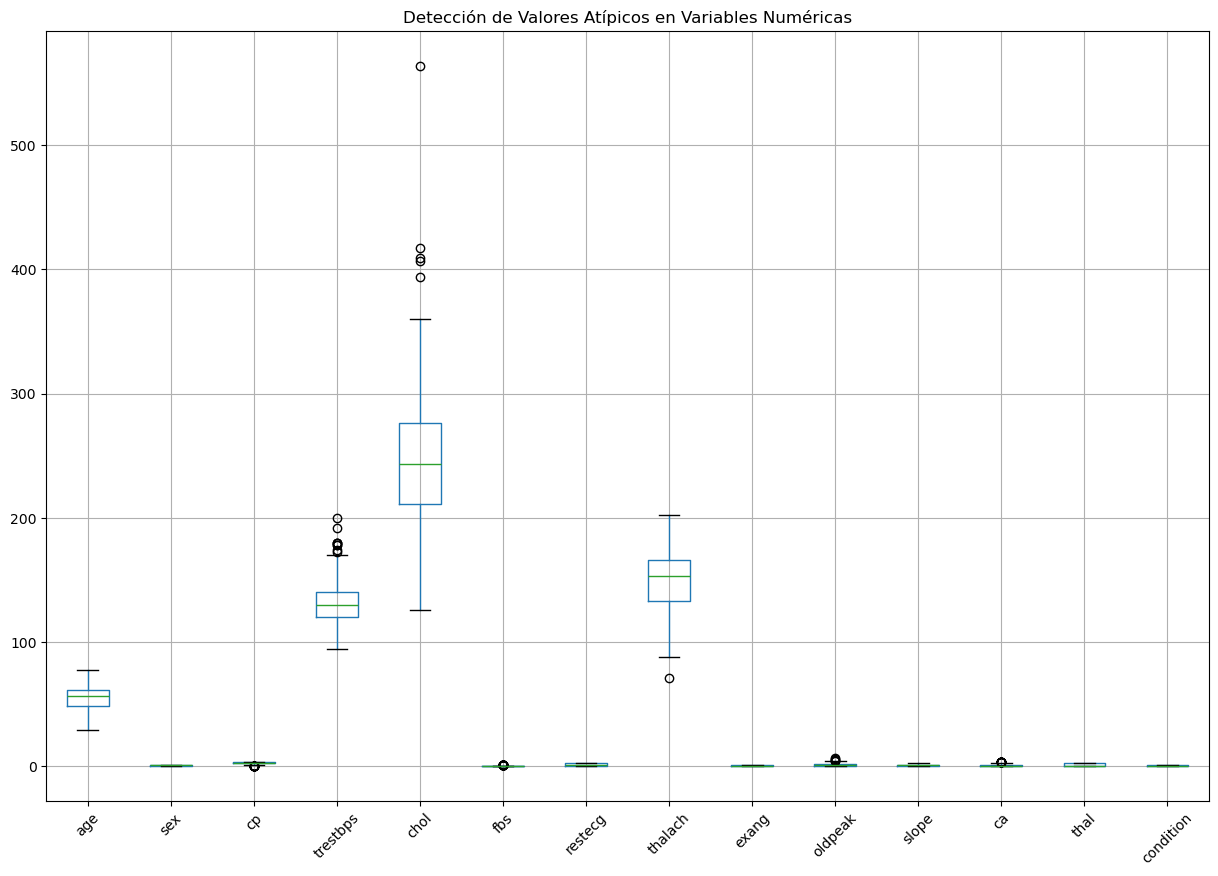

In [45]:
# Boxplots para cada columna numérica en el DataFrame
plt.figure(figsize=(15, 10))
df.select_dtypes(include=['float64', 'int64']).boxplot()  # Incluye solo columnas numéricas
plt.xticks(rotation=45)
plt.title("Detección de Valores Atípicos en Variables Numéricas")
plt.show()


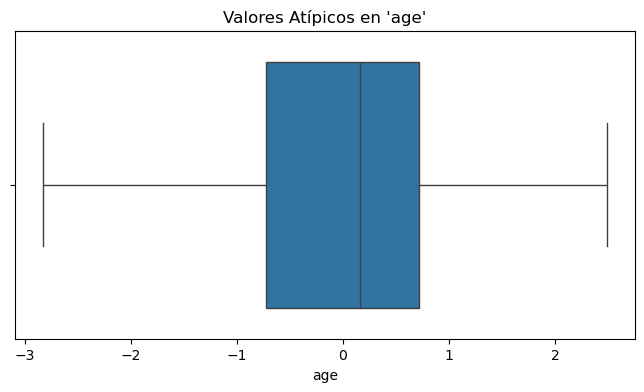

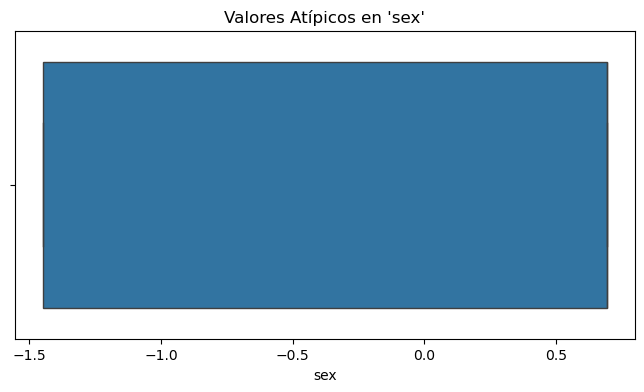

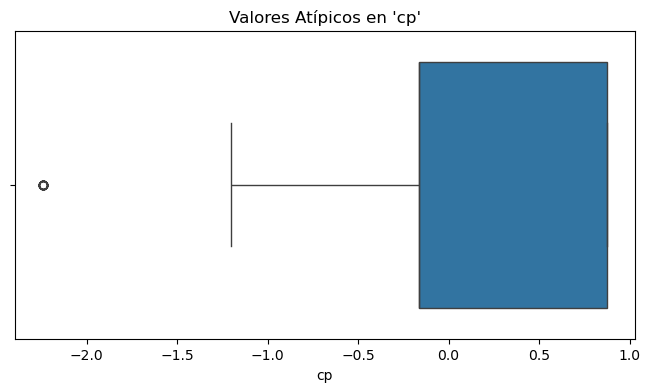

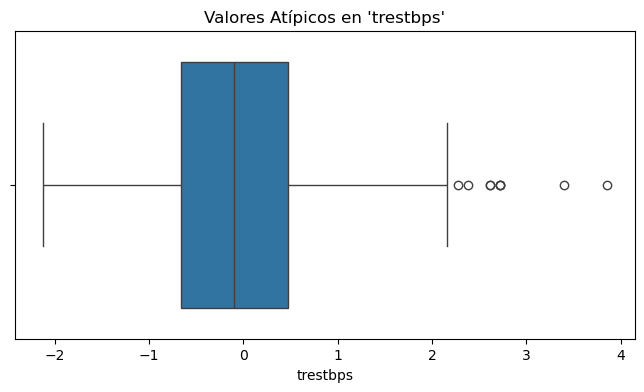

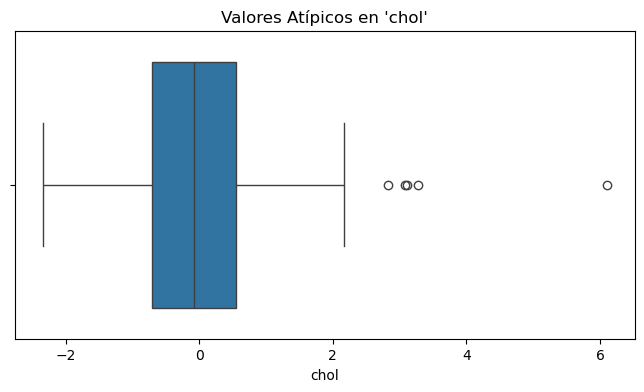

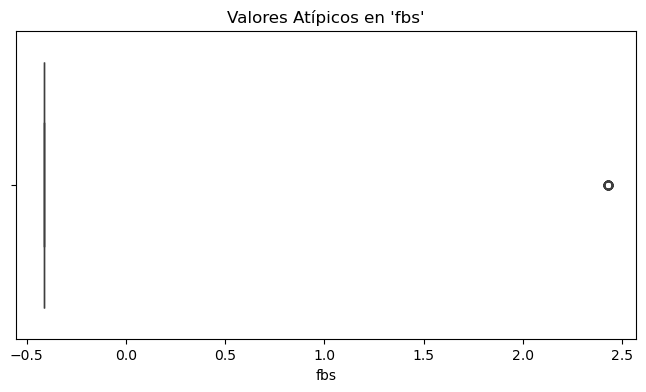

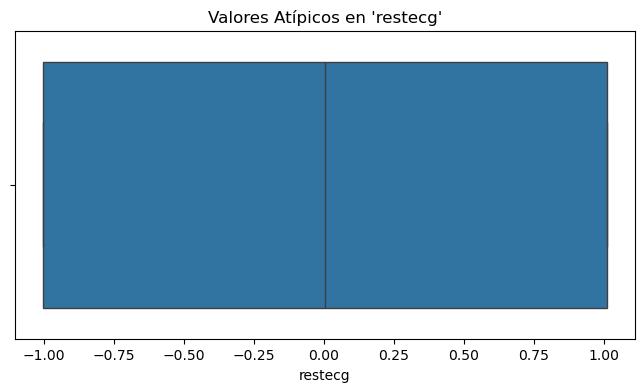

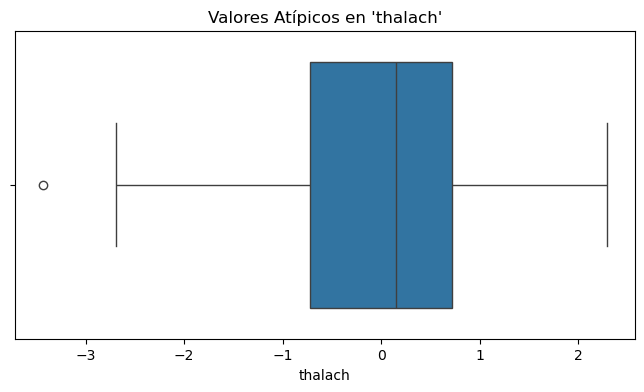

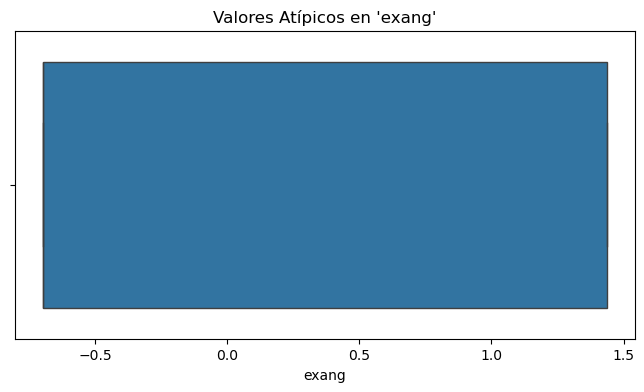

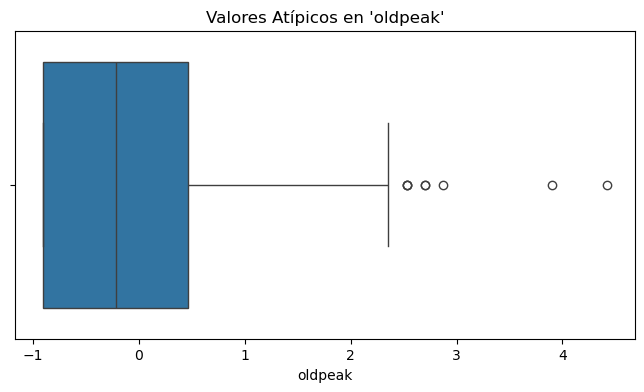

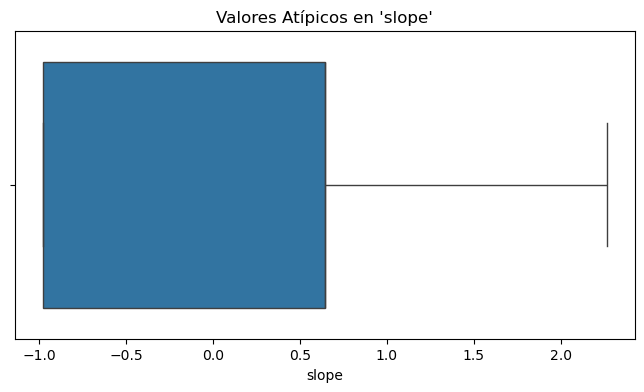

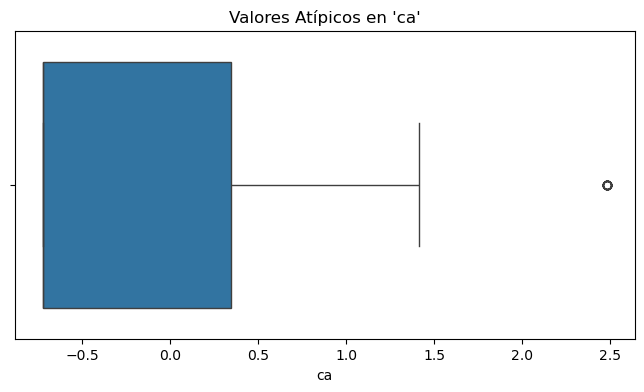

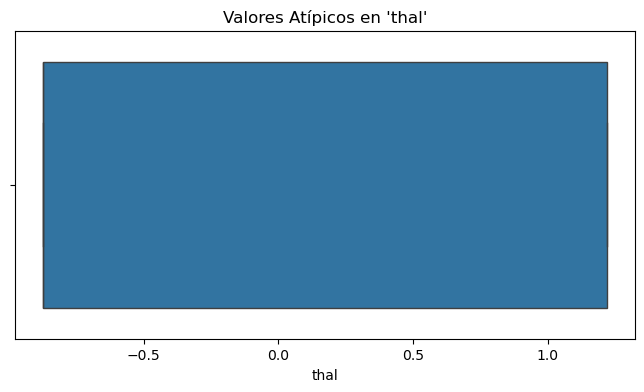

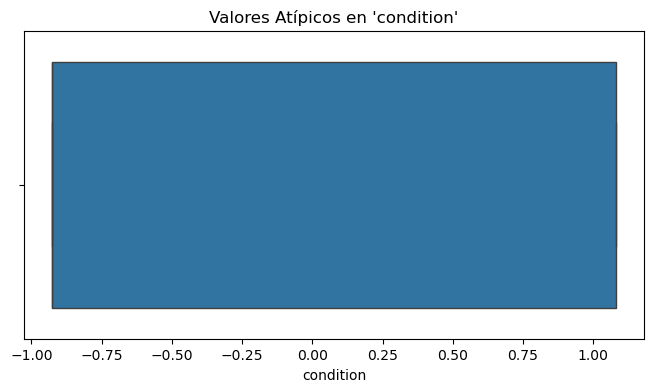

In [60]:
# Boxplots individuales para cada columna numérica en el DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un boxplot para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Valores Atípicos en '{col}'")
    plt.show()


In [93]:
# 1. Eliminar columnas con más del 50% de valores faltantes
missing_threshold = 0.6
columns_to_drop = df_cleaned.columns[df_cleaned.isnull().mean() > missing_threshold]
df_cleaned.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"Columnas eliminadas por alta cantidad de datos faltantes: {columns_to_drop.tolist()}")


Columnas eliminadas por alta cantidad de datos faltantes: []


In [78]:
# 2. Imputación de valores faltantes

# Para columnas numéricas, imputar con la mediana
num_imputer = SimpleImputer(strategy='median')
df_cleaned[df_cleaned.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))


In [81]:
# 3. Eliminar duplicados
df_cleaned.drop_duplicates(inplace=True)

# 4. Codificación de variables categóricas
# Usamos LabelEncoder para variables categóricas de dos clases y One-Hot Encoding para múltiples clases
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[column].nunique() == 2:
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [84]:
# 4. Codificación de variables categóricas
# Usamos LabelEncoder para variables categóricas de dos clases y One-Hot Encoding para múltiples clases
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if df_cleaned[column].nunique() == 2:
        le = LabelEncoder()
        df_cleaned[column] = le.fit_transform(df_cleaned[column])
    else:
        df_cleaned = pd.get_dummies(df_cleaned, columns=[column], drop_first=True)

In [89]:
# 5. Escalado de datos numéricos
scaler = StandardScaler()
num_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_columns] = scaler.fit_transform(df_cleaned[num_columns])


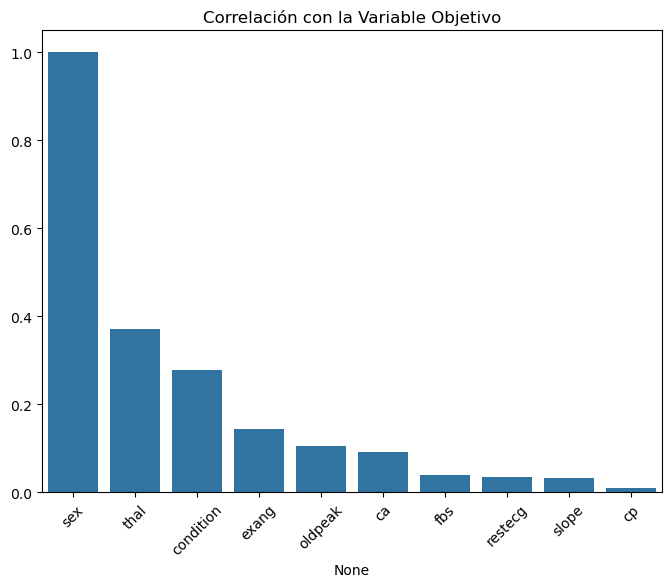

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la correlación de cada característica con la variable objetivo
correlation = df_cleaned.corr()
target_correlation = correlation['sex'].sort_values(ascending=False)  # Cambia 'columna_objetivo' por tu variable objetivo

# Visualiza las 10 características más correlacionadas
plt.figure(figsize=(8, 6))
sns.barplot(x=target_correlation.index[:10], y=target_correlation.values[:10])
plt.xticks(rotation=45)
plt.title("Correlación con la Variable Objetivo")
plt.show()


In [113]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df_cleaned.drop('sex', axis=1)  # Reemplaza 'columna_objetivo' con el nombre de tu variable objetivo
y = df_cleaned['sex']  # Reemplaza 'columna_objetivo' con el nombre de tu variable objetivo

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmación de la división
print(f"Tamaño de Train: {X_train.shape}, Tamaño de Test: {X_test.shape}")


Tamaño de Train: (237, 13), Tamaño de Test: (60, 13)


In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = best_log_reg.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Cambia a 'binary' para problemas binarios
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


NameError: name 'best_log_reg' is not defined

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_pred' is not defined

In [131]:
# Calcular residuos
residuals = y_test - y_pred

# Graficar residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


NameError: name 'y_pred' is not defined

In [133]:
# Graficar Predicciones vs. Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Línea de identidad
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()


NameError: name 'y_pred' is not defined

<Figure size 800x600 with 0 Axes>